## Speedup and Strong Scaling

_Strong scaling_ is the concept of solving a problem of a constant size faster with more resources.
_Speedup_ is the measure of how the solution increases in speed as a function of adding parallel resources.

### DES cracking as an example.

DES is a (now outdated) standard for encryption that uses a 56-bit key.  The state space of the DES key ($2^56$ bits) is small enough that programmers implemented a brute force search (of the entire key space) to break the cipher.  Strong scaling (and Moore's law) has seen this problem become simpler over time.  The solution has evolved:
* \$20M (est) 1976
* 1998, 4.5 days, \$250,000 
* 1999 22 hours, \$250,000
* 2006,  9 days, \$10,000
* 2008, 1 days, \$10,000

### Motivations for Parallel Computing

Two traditional motivations of parallel computing are to either
  * solve problems faster (strong scaling, this lecture) using more resources
  * solve larger problems (weak scaling, next lecture) using more resources
Both are important and they have different challenges at times.

There are also other reasons for parallelism, mostly because hardware demands it to realize full utilization
  * maximize efficiency
  * minimize costs, power

### Speedup

The fundamental concept in parallelism
  * $T(1)$ = time to execute task on a single resource
  * $T(n)$ = time to execute task on n resources
  * Speedup = $T(1)/T(n)$
This conforms exactly with Amdahl's Law.



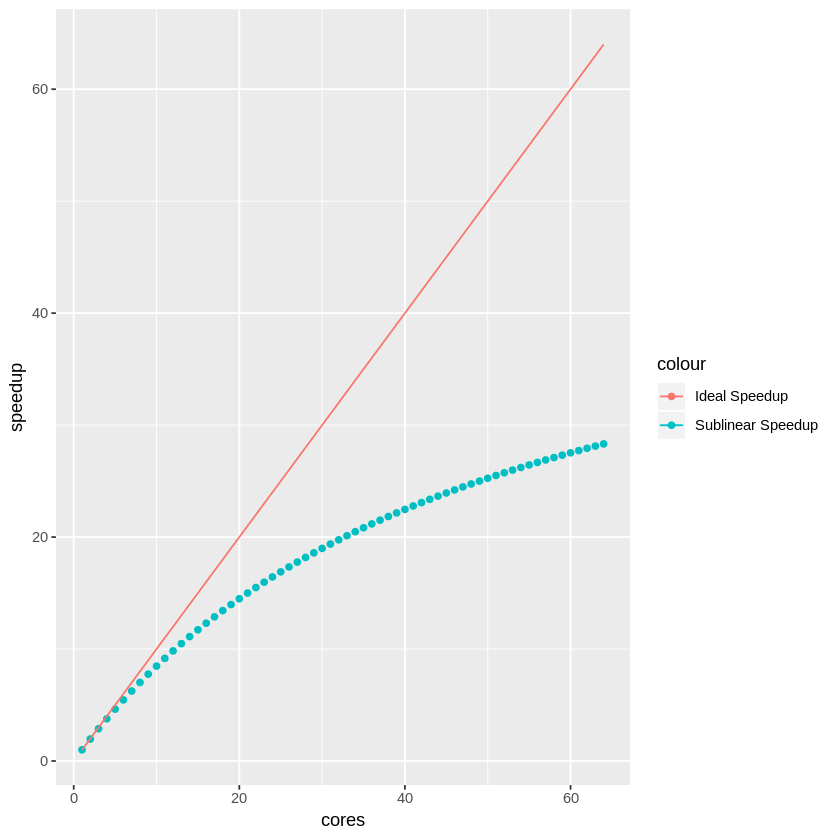

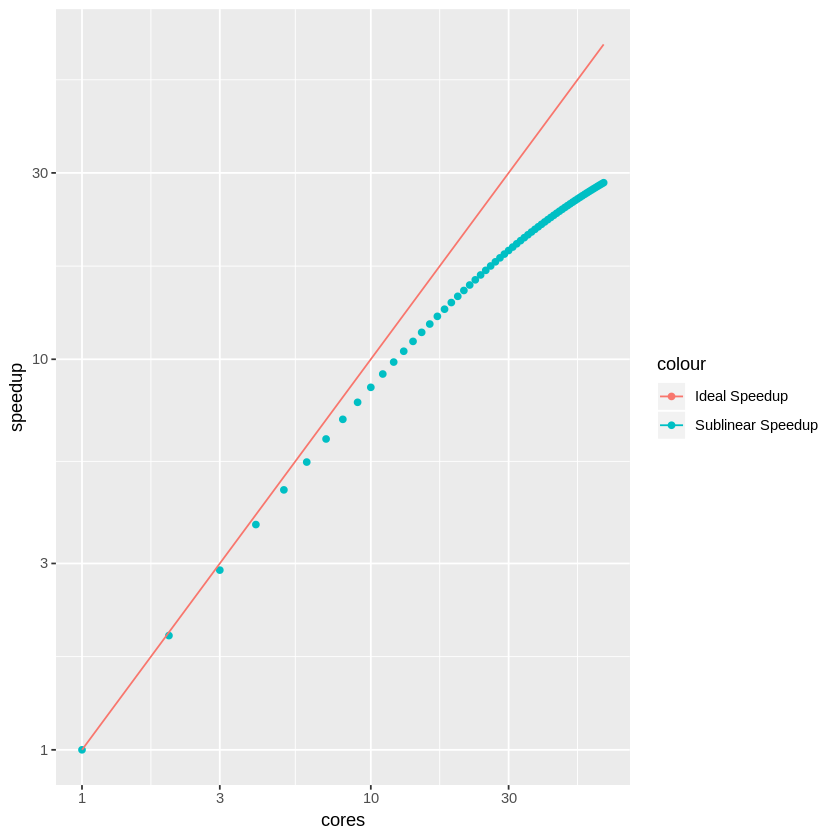

In [16]:
library(ggplot2)

cores = seq(1:1:64)

p = .98
        
amdahl <- data.frame(cores, 1/((1-p)+p/cores))
colnames(amdahl) <- c("cores","speedup")

aplot <- ggplot(amdahl, aes(x=cores, y=speedup, color="Sublinear Speedup")) + geom_point() +
  geom_line(data=amdahl, aes(x=cores,y=cores, color="Ideal Speedup"))

print(aplot)

aplot <- aplot + scale_x_log10() + scale_y_log10()

print(aplot)

### Properties of a Speedup Plot

* x-axis should have resources
* y-axis should be speedup ($T(1)/T(n)$)
* axes should be linear-linear or log-log (log-log more common)

When I ask for speedup, this is what I am looking for.


## Parallel Efficiency

Companion concept to speedup.
* Efficiency; $E = S(n)/n = T(1)/nT(n)$
* Informally: fraction of possible performance realized
